In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from math import sqrt
import random
# from math sqrt
import matplotlib.pyplot as plt
from xgboost.sklearn import XGBRegressor

train=pd.read_csv(r'train.csv')
to_test=pd.read_csv(r'test.csv')

x_train = train
x_train['Date'] = pd.to_datetime(x_train['Date'], errors='coerce')
x_train['Season'] = x_train['Date'].dt.month
x_train['Season']=x_train['Season'].replace([4,5,6,7,8,9],1)
x_train['Season']=x_train['Season'].replace([1,2,3,10,11,12],0)
x_train['Weekend'] = x_train['Date'].dt.dayofweek
x_train['Weekend']=x_train['Weekend'].replace([0,1,2,3,4,5,6],[0,0,0,0,1,1,0])
x_train.head()
test = train['n_Procedure']

In [2]:
x_a = []
y_a = []
x_b = []
y_b = []
x_c = []
y_c = []
for i in range(len(test)):
    if(x_train['Procedure'][i] == 'A'):
        x_a.append([x_train['Temperature'][i],x_train['EventTarget'][i],x_train['Season'][i],x_train['Weekend'][i]])
        y_a.append(test[i])
    elif(train['Procedure'][i] == 'B'):
        x_b.append([x_train['Temperature'][i],x_train['EventTarget'][i],x_train['Season'][i],x_train['Weekend'][i]])
        y_b.append(test[i])
    elif(train['Procedure'][i] == 'C'):
        x_c.append([x_train['Temperature'][i],x_train['EventTarget'][i],x_train['Season'][i],x_train['Weekend'][i]])
        y_c.append(test[i])

In [3]:
X = []
Y = []
prev = 20
for i in range(prev):
    X.append(x_a[i])
    Y.append(y_a[i])

In [8]:
clf = XGBRegressor(colsample_bytree = 0.5, learning_rate = 1,
                max_depth = 15, alpha = 5, n_estimators = 10)
# clf = SVR(C = 100)
clf.fit(X, Y)
y_pred = clf.predict(X)
for i in range(prev,len(x_a)):
    y_pred = np.append(y_pred, clf.predict([x_a[i]]))
    del X[0]
    X.append(x_a[i])
    del Y[0]
    Y.append(clf.predict(x_a[i]))
    clf = XGBRegressor(colsample_bytree = 0.5, learning_rate = 1,
                max_depth = 10, alpha = 5, n_estimators = 10)

    clf.fit(X,Y)
#     print(y_pred)

[00:52:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1572314959925/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:52:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1572314959925/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:52:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1572314959925/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:52:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1572314959925/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:52:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1572314959925/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:52:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost

[00:52:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1572314959925/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:52:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1572314959925/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:52:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1572314959925/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:52:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1572314959925/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:52:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1572314959925/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:52:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost

[00:52:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1572314959925/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:52:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1572314959925/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:52:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1572314959925/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:52:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1572314959925/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:52:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1572314959925/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:52:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost

[00:52:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1572314959925/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:52:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1572314959925/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:52:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1572314959925/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:52:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1572314959925/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:52:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1572314959925/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:52:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost

In [9]:
y_pred

array([6.358757 , 6.3741627, 6.258769 , 6.260609 , 6.3741627, 6.3741627,
       6.3741627, 6.358467 , 6.3741627, 6.276015 , 6.260609 , 6.358757 ,
       6.3741627, 6.3741627, 6.3750873, 6.3593917, 6.2764015, 6.2615337,
       6.3741627, 6.358757 , 6.3741627, 6.2756324, 6.2755075, 6.367606 ,
       6.3673153, 6.368532 , 6.368909 , 6.3686085, 6.278556 , 6.2773943,
       6.368581 , 6.3688965, 6.3662534, 6.368609 , 6.368781 , 6.276333 ,
       6.2808113, 6.3687863, 6.368065 , 6.364551 , 6.3684616, 6.3674073,
       6.277704 , 6.281957 , 6.359292 , 6.359264 , 6.3674946, 6.3659678,
       6.3673153, 6.286282 , 6.2844415, 6.358098 , 6.3578777, 6.367137 ,
       6.3681374, 6.35965  , 6.2874374, 6.291638 , 6.365454 , 6.3637233,
       6.3672056, 6.3669696, 6.367349 , 6.2931323, 6.288671 , 6.367521 ,
       6.3675404, 6.367247 , 6.367306 , 6.3610177, 6.292459 , 6.298555 ,
       6.357662 , 6.3575177, 6.357573 , 6.3573422, 6.367566 , 6.2927456,
       6.302437 , 6.3575053, 6.3674283, 6.358605 , 

In [10]:
y_pred=np.round(y_pred)
print(np.exp(-sqrt(mean_squared_error(y_a,y_pred))))
print(sqrt(mean_squared_error(y_a,y_pred)))

0.10212464602516214
2.2815611919018606


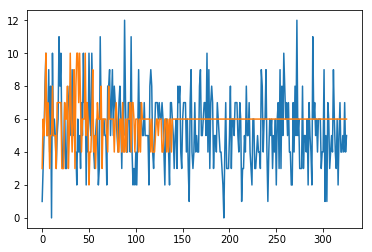

In [7]:
plt.plot(y_a)
plt.plot(y_pred)
plt.show()